# Model A in minist

# Overall Description
The dataset includes grayscale image of handwritten digits (28 x 28 pixels) into 10 categories. It includes 60,000 training images and 10,000 testing images from National Institute of Standards and Technology. This models aims at multiclass classification problem.

This model uses basic syntax to perform. According to building the model, there are three key things to mention: RMSProp optimizer,  categorical_crossentropy loss function (measures the distance between two probability distributions), accuracy metrics to monitor.

Improvement: Next time will try to use CNN model to get higher accuracy.

# Model
1. Data transformation
2. Model
3. Evaluation

# Data Transformation

In [1]:
# Loading the dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow.python.trackable'

In [2]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [3]:
# Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model architecture

In [4]:
# Network architecture
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Metal device set to: Apple M1 Pro


2023-01-20 09:25:40.233927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-20 09:25:40.234602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
# setting aside a validation set
train_val = train_images[:30000]
partial_train_val = train_images[30000:]
train_lab_val = train_labels[:30000]
partial_train_lab_val = train_labels[30000:]

In [7]:
# fit the model to training data
# history = network.fit(train_images, train_labels, epochs=10, batch_size=128)
history = network.fit(partial_train_val, partial_train_lab_val, epochs=10, batch_size=128,
                      validation_data=(train_val, train_lab_val))

Epoch 1/10


2023-01-20 09:25:46.577671: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-20 09:25:46.741435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.9010

2023-01-20 09:25:50.735365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 6s 18ms/step - loss: 0.3388 - accuracy: 0.9010 - val_loss: 0.2064 - val_accuracy: 0.9401
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1546 - accuracy: 0.9549 - val_loss: 0.1469 - val_accuracy: 0.9566
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1043 - accuracy: 0.9688 - val_loss: 0.1173 - val_accuracy: 0.9650
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0745 - accuracy: 0.9770 - val_loss: 0.1083 - val_accuracy: 0.9679
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0534 - accuracy: 0.9839 - val_loss: 0.0945 - val_accuracy: 0.9716
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.1056 - val_accuracy: 0.9691
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0301 - accuracy: 0.9914 - val_loss: 0.0934 - val_accuracy: 0.9724
Epoch 8/10

 76/313 [======>.......................] - ETA: 0s

2023-01-20 09:26:39.205446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


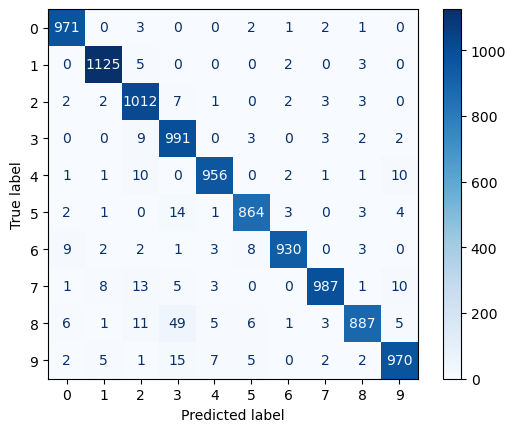

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np
test_predictions = network.predict(test_images)
y_test_arg=np.argmax(test_labels,axis=1)
Y_pred = np.argmax(test_predictions,axis=1)

cm = confusion_matrix(y_test_arg, Y_pred)
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 [==============================] - 1s 2ms/step
ROC AUC score: 0.9827364772990297


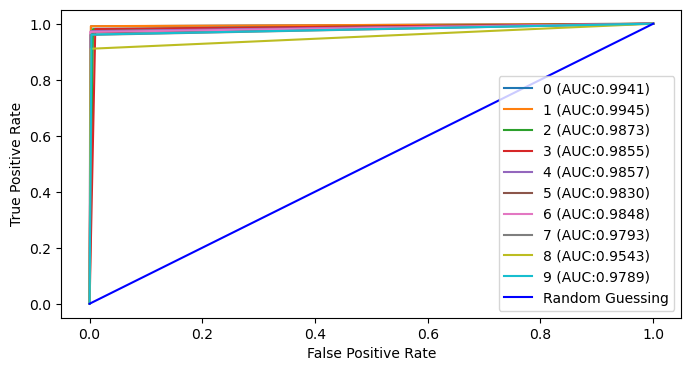

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (8, 4))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.4f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

test_predictions = network.predict(test_images)
y_test_arg=np.argmax(test_labels,axis=1)
Y_pred = np.argmax(test_predictions,axis=1)
print('ROC AUC score:', multiclass_roc_auc_score(y_test_arg, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


# Evaluation

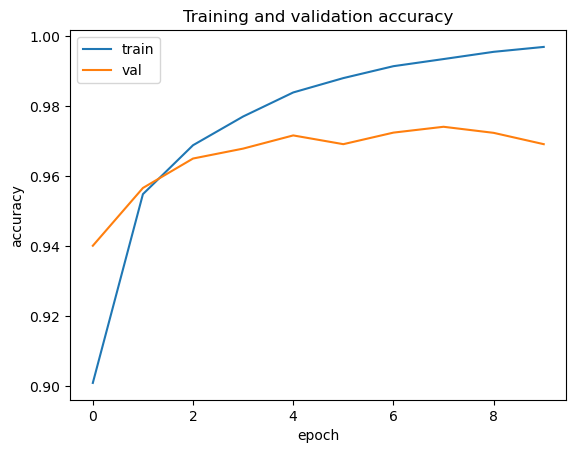

In [10]:
# plotting the training and validation accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

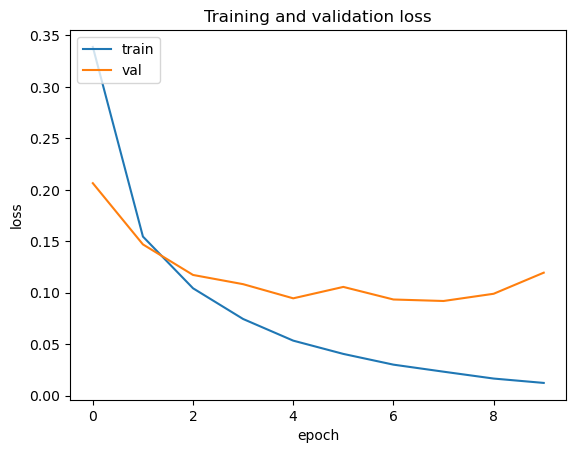

In [11]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [57]:
# Save the model
# network.save('mnist_modala')

INFO:tensorflow:Assets written to: mnist_modala/assets


# Reference
Chollet, F. (2021). Deep Learning with Python, Second Edition. Manning Publications Co. LLC.
Keras - Plot training, v., Verma, R., & Snoopy, D. (2017). Keras - Plot training, validation and test set accuracy. Retrieved 16 January 2023, from https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy